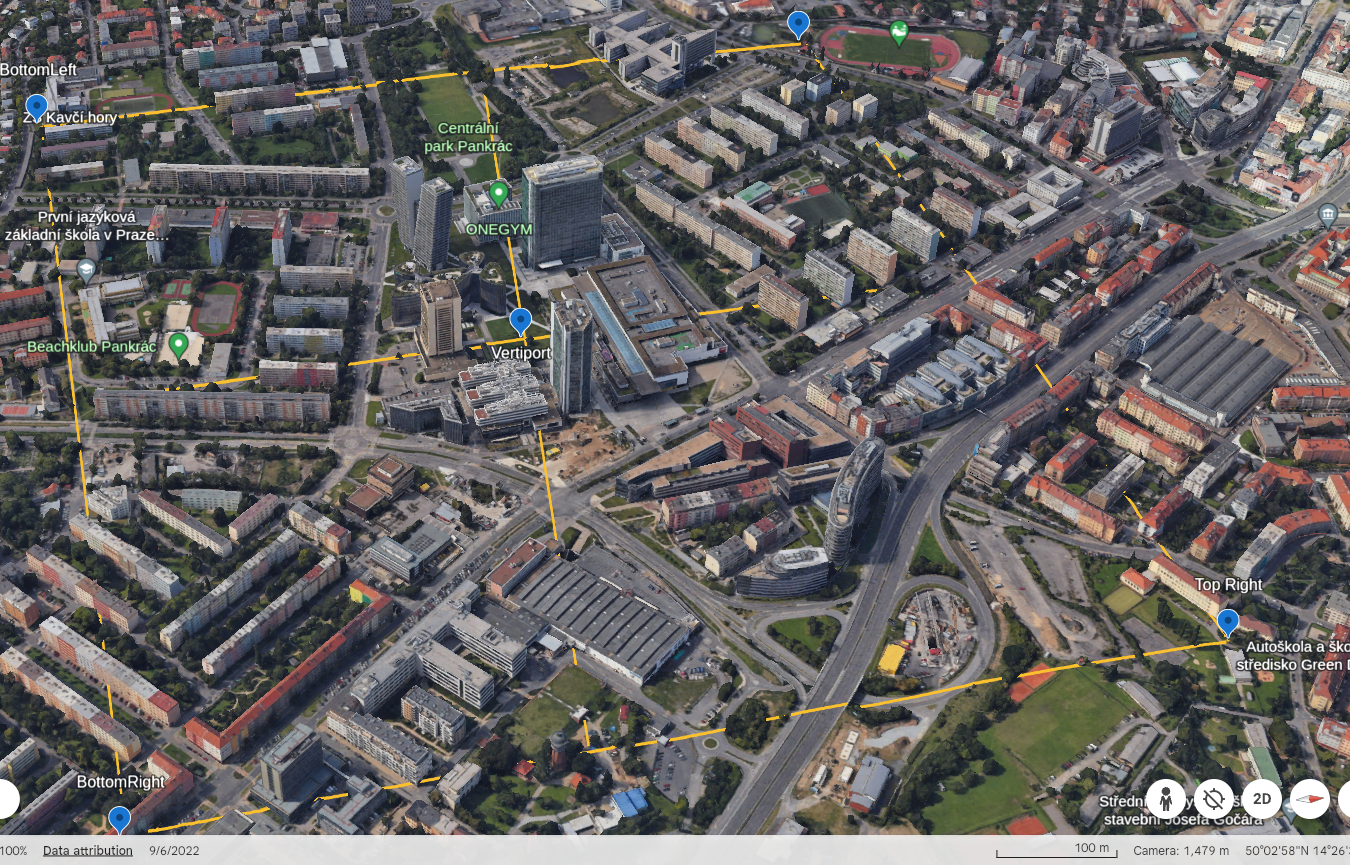

In [1]:
# Reconstructing Wind and TKE for drone operations using AI.
%load_ext autoreload
%autoreload 2

from IPython.display import Image
Image(filename='praguesimulated.png') 

In [2]:


# Install requirements !pip install -r requirements.txt

# Load libraries after adding relative path. 
#%run '/media/mandart/D/AI4Hydrop_Prague/ROM/Results/data_POD/libimport.py'
import os,sys
current_dir = os.getcwd()    # Get the current directory 
sys.path.append(current_dir)
fn=os.path.join(current_dir, 'Results','data_POD')
fn2=os.path.join(current_dir, 'Results','data_POD')
sys.path.append(fn2)
import libimport
import pandas as pd
import math


Directory '/media/mandart/D/AI4Hydrop_Prague/ROM/Results/data_POD' already exists.
Wind direction: 33
Latitude list: [50.05, 50.047]
Longitude list: [14.44, 14.431]
Altitude list: [270, 300]
  
Reconstruct data using wind direction
  
/media/mandart/D/AI4Hydrop_Prague/ROM/Results/data_POD/k_rbf_interpolators_all.pkl
wind speed 5
wind direction 33
Coeff for mode 1 is  -117.33679940478987
Coeff for mode 2 is  46.11726131737771
Coeff for mode 3 is  23.250760236162023
Coeff for mode 4 is  39.671538045178295
Coeff for mode 5 is  38.866477498889935
Coeff for mode 6 is  -22.53661503758576
Coeff for mode 7 is  -32.92292486473525
Coeff for mode 8 is  -17.662317179113415
Coeff for mode 9 is  6.270922307257933
Coeff for mode 10 is  5.85268902700011
Coeff for mode 11 is  15.280871738833412
Coeff for mode 12 is  -11.416265476232184
Coeff for mode 13 is  1.4024690696169273
Coeff for mode 14 is  0.7703745403350695
Coeff for mode 15 is  12.108808616147712
Coeff for mode 16 is  -0.383181401280126
Coeff

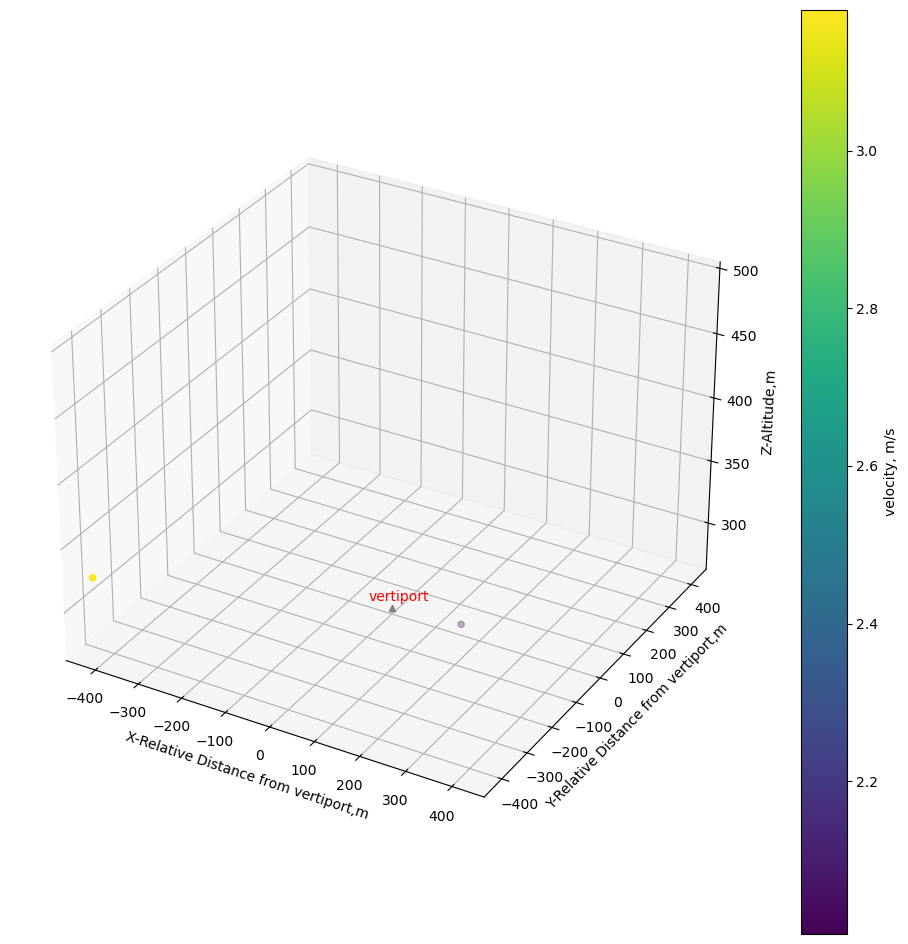

<Figure size 640x480 with 0 Axes>

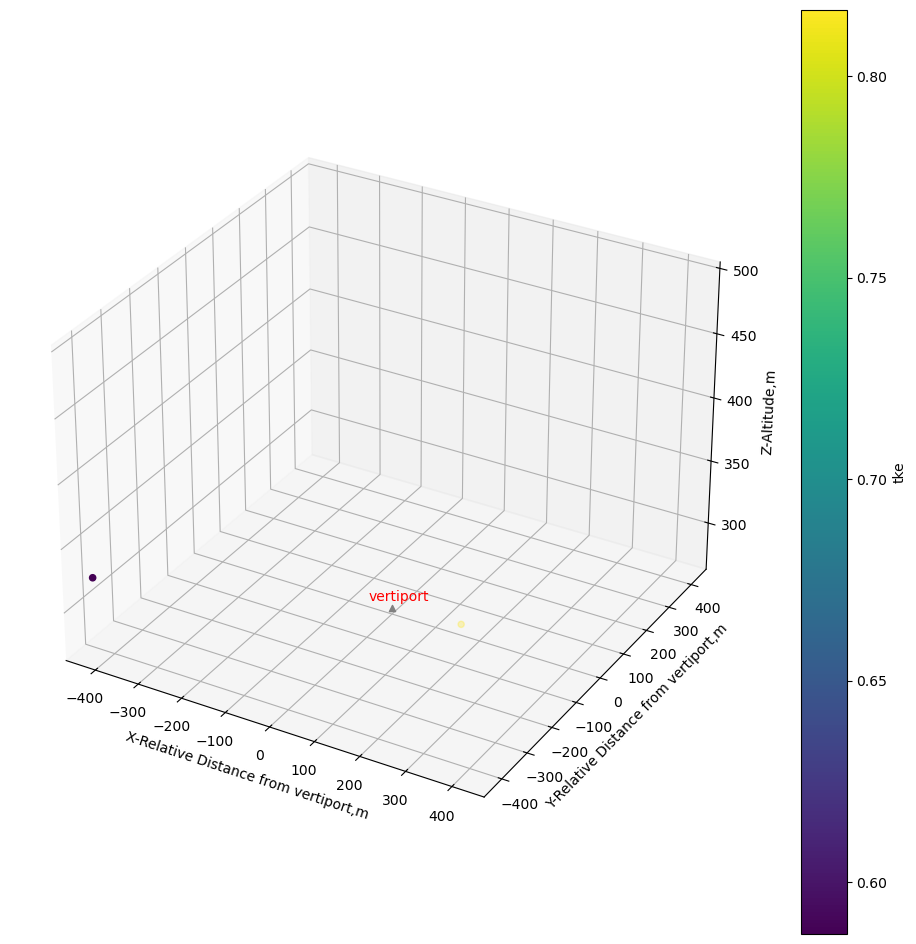

153.0612244897959


/media/mandart/D/AI4Hydrop_Prague/ROM/.conda/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vuetify' from 'trame.widgets' (/media/mandart/D/AI4Hydrop_Prague/ROM/.conda/lib/python3.11/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


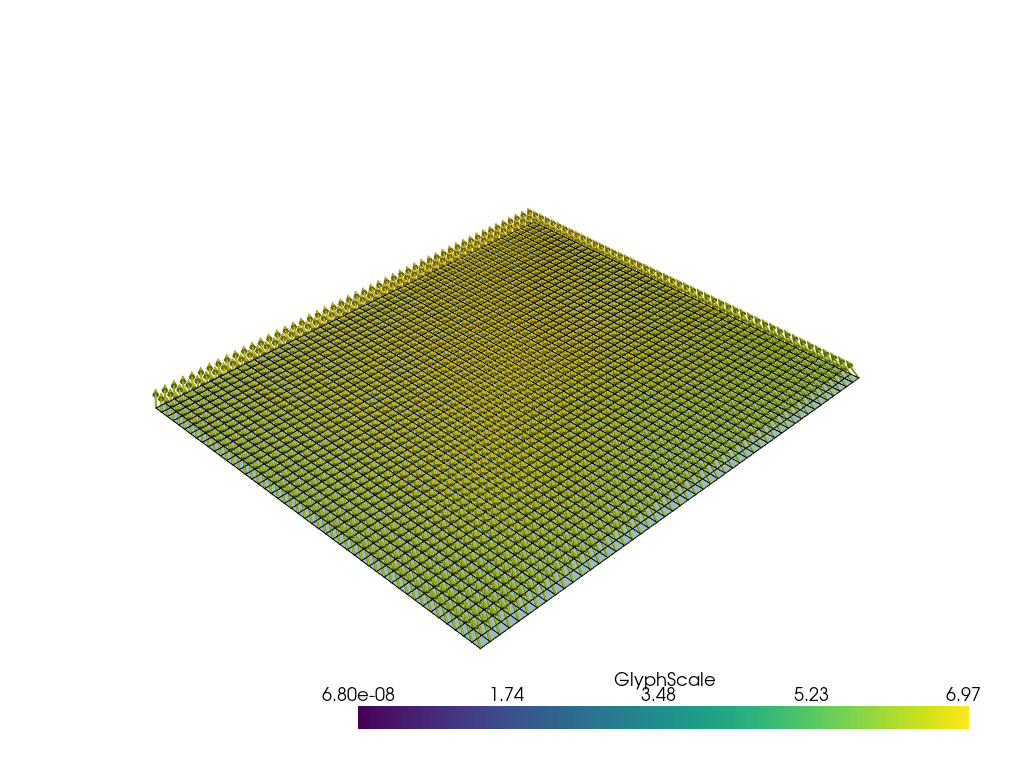

<Figure size 640x480 with 0 Axes>

In [3]:
if not os.path.exists(fn2):
    # If it doesn't exist, create the directory
    os.makedirs(directory_path)
    print(f"Directory '{fn2}' created successfully.")
else:
    print(f"Directory '{fn2}' already exists.")

path1=os.path.join(fn2,'libimport.py')   
path2=os.path.join(fn2,'funcimport.py')

# Step . Ask for user inputs - wind direction in degrees, locations in latitude/longitude.
# Ask for user inputs

user_input_at_command=False

if user_input_at_command==True:
    
    wind_direc = float(input("Enter single wind direction in degree: "))
    
    wind_speed = float(input("Enter  inlet wind speed in mps in region between 0.5 to 8 mps:"))
    
    latitude_input = input("Enter list of latitudes (Y) in Decimal Degree(in comma-separated in range between 50.04585949932427 and 50.053957709673476) : example - 50.05,50.047 ")

    longitude_input = input("Enter list of longitudes (X) in Decimal Degree (in comma-separated in range between 14.430968123655077 and 14.444980676344922): 14.44,14.431")

    altitude_input = input("Enter list of altitudes in m 267m>Z>500m (comma-separated): 270,300")
    
    longitude_list = [float(lon) for lon in longitude_input.split(',')]
    altitude_list = [float(alt) for alt in altitude_input.split(',')]
    latitude_list = [float(lat) for lat in latitude_input.split(',')]
    
else:
    wind_direc=90
    wind_speed=5
    latitude_list=[50.05,50.047]
    longitude_list=[14.44,14.431]
    altitude_list=[270,300]



#Check if all points are within the range . Keep only those that are in the range.count


# Print the inputs for verification
if len(latitude_list) != len(longitude_list) or len(latitude_list) != len(altitude_list):
    print("Error: The lists of latitude, longitude, and altitude must have the same length.")
else:
    print("Wind direction:", wind_direc)
    print("Latitude list:", latitude_list)
    print("Longitude list:", longitude_list)
    print("Altitude list:", altitude_list)


# Step . Reconstruct data using wind direction.
print("  ")
print("Reconstruct data using wind direction")
print("  ")
result_samples_k,dataframe_k,timetaken_k=libimport.reconstruct_AI_for_winddirection_windspeed("k",wind_direc,wind_speed,fn,vectorU=False) #nr not needed.
result_samples_U,dataframe_U,timetaken_U=libimport.reconstruct_AI_for_winddirection_windspeed("U",wind_direc,wind_speed,fn,vectorU=True)  #nr not neeeded. 
merged_dataframe_U_k_Relative_2_vertiport_reconstructed = pd.merge(dataframe_k,dataframe_U, on=['X','Y','Z'], how='outer')
print(f'Total time taken for reconstruction - {timetaken_U+timetaken_k} s')
print("  ")

ref_long_at_vertiport=14.4379744
ref_latitude_at_vertiport=50.0499086
#Latitude is the Y axis, longitude is the X axis. Belo since X,Y are relative to vertiport. Hence, we use this to obtain relative change in latitude/long from vertiport. then add reference to this change to get actual latitude and longitude.
merged_dataframe_U_k_Relative_2_vertiport_reconstructed['latitude']=(merged_dataframe_U_k_Relative_2_vertiport_reconstructed['Y'] / 111139)+ref_latitude_at_vertiport
lat_rad= math.radians(ref_latitude_at_vertiport) #merged_df_U_k_Relative_2_vertiport_reconstructed['latitude'].apply(math.radians)
#lat_rad.apply(math.cos)
cos_lat_rad=math.cos(lat_rad)
merged_dataframe_U_k_Relative_2_vertiport_reconstructed['longitude']=(merged_dataframe_U_k_Relative_2_vertiport_reconstructed['X'] / (111139 * cos_lat_rad))+ref_long_at_vertiport

# Step. Obtain values at specific points. 
print("  ")
print("Obtain values at specific points from reconstructed field")
print("  ")
dataset_nearest_latlong =libimport.get_U_and_k_for_location(longitude_list,latitude_list,altitude_list,merged_dataframe_U_k_Relative_2_vertiport_reconstructed,relative_distance_in_meter__or__Latlong='relat')
print(dataset_nearest_latlong)
print(" ")
print("1. See CSV files for output velocity and turbulence at chosen location")
print(" ")
print("2. See Saved VTK file for entire field")

#  Step 5. Visualize the trajectory.
print("  ")
print("Visualize")
print("  ")
stride=80
libimport.visualize_plot(dataset_nearest_latlong,merged_dataframe_U_k_Relative_2_vertiport_reconstructed[::stride],wind_direc,wind_speed,result_samples_U)

# visualize at a surface normal to the z

33


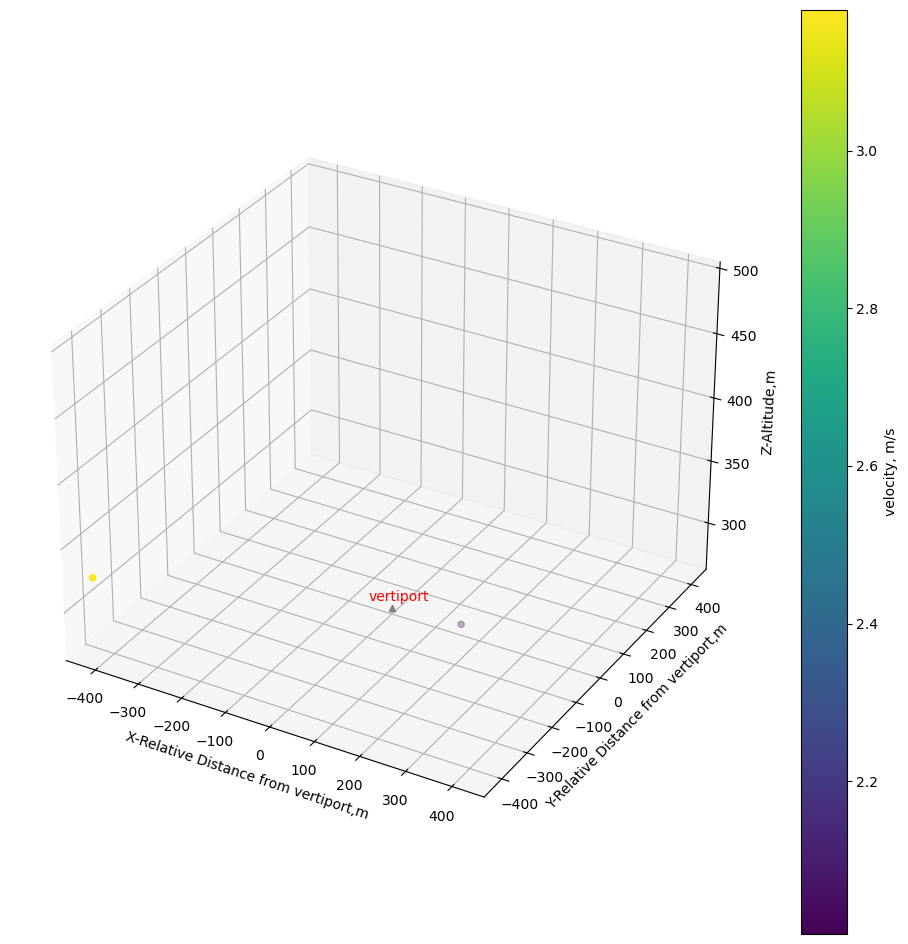

<Figure size 640x480 with 0 Axes>

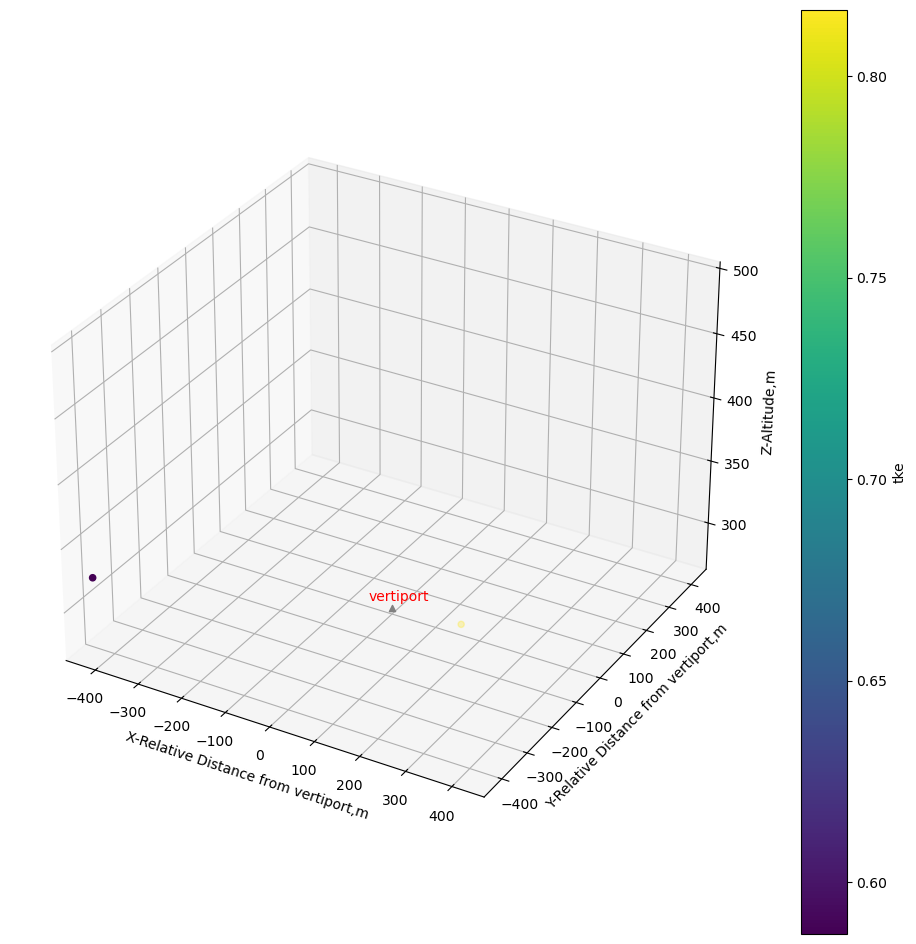

153.0612244897959


/media/mandart/D/AI4Hydrop_Prague/ROM/.conda/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vuetify' from 'trame.widgets' (/media/mandart/D/AI4Hydrop_Prague/ROM/.conda/lib/python3.11/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


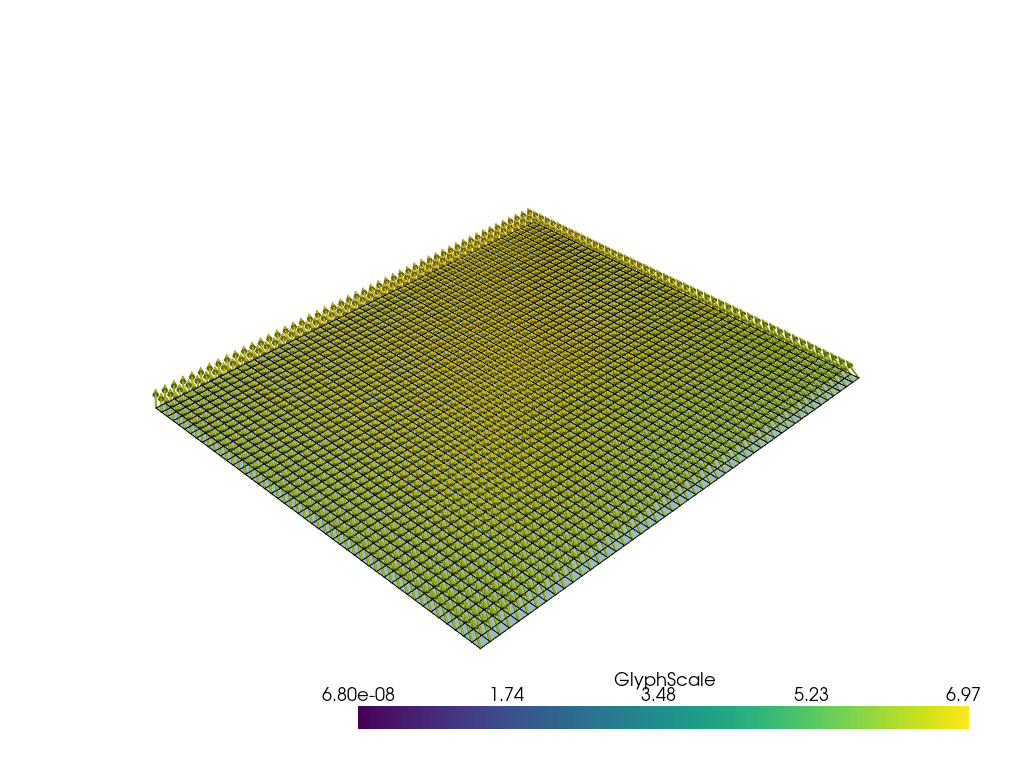

<Figure size 640x480 with 0 Axes>

In [4]:
stride=80
libimport.visualize_plot(dataset_nearest_latlong,merged_dataframe_U_k_Relative_2_vertiport_reconstructed[::stride],wind_direc,wind_speed,result_samples_U)

# visualize at a surface normal to the z

## Ends here 
##################################################################################3.

In [5]:
result_samples_U['RECON_U_at_WD_WS33_5']

pyvista_ndarray([[-3.92884705e-08, -3.92743146e-08, -3.92743146e-08],
                 [-3.92754705e-08, -3.92743146e-08, -3.92743146e-08],
                 [-3.92742782e-08, -3.92743146e-08, -3.92743146e-08],
                 ...,
                 [-3.45994202e+00, -5.35837797e+00,  5.65950272e-03],
                 [-3.45981205e+00, -5.35741285e+00,  2.76309695e-03],
                 [-3.92743146e-08, -3.92743146e-08, -3.92743146e-08]])

In [6]:
latitude_list

[50.05, 50.047]